# Marked Tutorial 2

Task 1: Design a fuzzy interface system such that average waiting times for cars on main and side street are as close as possible.


Here, we consider a simple intersection which is made of two streets, Main and Side, and no turning lanes. By default, the traffic lights are green for the Main street and red for the Side street. When there is some traffic on the Side, the FIS is activated. Street sensors provide information on the number of cars on the Main street (incoming traffic) and the number of cars on the Side street (waiting traffic). Based on this information, the FIS needs to make decisions on:

- waiting duration: the duration before the traffic lights on the Side street switch to green; and
- green duration: the duration for which the Side traffic lights stay green.

  Both durations are measured in seconds.


## Task

Design a fuzzy interface system such that average waiting times for cars on main and side street are as close as possible

## Implemented changes

- changed the memebership functions to a combination of trapezoidal and triangular membership functions
- keeping the membership function for incoming traffic and waiting traffic identical, as well as keeping the membership funcions for open duration and waiting duration identical, produced expected results.


# A. Basic FIS implementation


In [17]:
# pip install -U scikit-fuzzy

## 1- Inputs & outputs


In [18]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


waitingTraffic = ctrl.Antecedent(np.arange(1, 100, 1), "waiting")
incomingTraffic = ctrl.Antecedent(np.arange(0, 100, 1), "incoming")

waitingDuration = ctrl.Consequent(np.arange(0, 120, 1), "wait duration")
openDuration = ctrl.Consequent(np.arange(0, 120, 1), "open duration")

## 2- Fuzzification & membership functions


c:\Users\ajult\.conda\envs\py310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


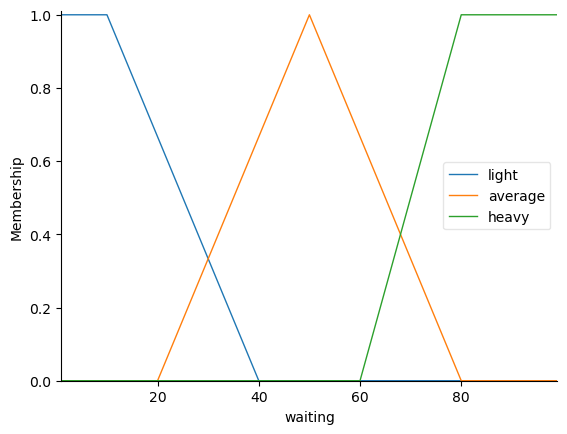

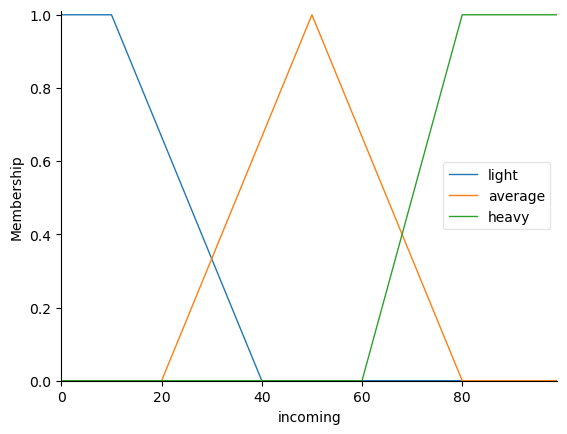

In [19]:
# fuzzySetNamesTraffic = ["light", "average", "heavy"]
# waitingTraffic.automf(names=fuzzySetNamesTraffic)
# incomingTraffic.automf(names=fuzzySetNamesTraffic)
# waitingTraffic.view()
# incomingTraffic.view()

# fuzzySetNamesDuration = ["short", "medium", "long"]
# waitingDuration.automf(names=fuzzySetNamesDuration)
# openDuration.automf(names=fuzzySetNamesDuration)
# waitingDuration.view()
# openDuration.view()

# lets add trapezoidal membership functions
waitingTraffic["light"] = fuzz.trapmf(waitingTraffic.universe, [1, 1, 10, 40])
waitingTraffic["average"] = fuzz.trimf(waitingTraffic.universe, [20, 50, 80])
waitingTraffic["heavy"] = fuzz.trapmf(waitingTraffic.universe, [60, 80, 100, 100])
incomingTraffic["light"] = fuzz.trapmf(incomingTraffic.universe, [0, 0, 10, 40])
incomingTraffic["average"] = fuzz.trimf(incomingTraffic.universe, [20, 50, 80])
incomingTraffic["heavy"] = fuzz.trapmf(incomingTraffic.universe, [60, 80, 100, 100])
waitingTraffic.view()
incomingTraffic.view()

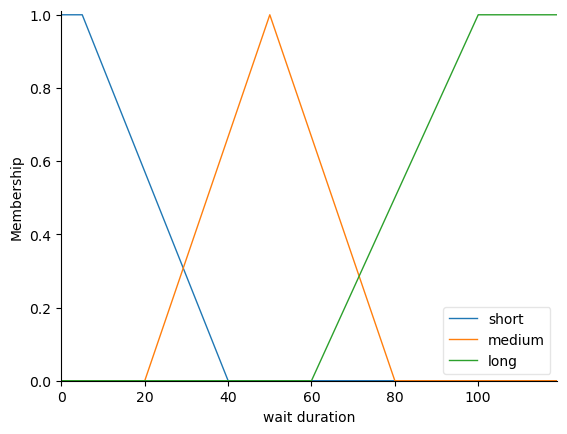

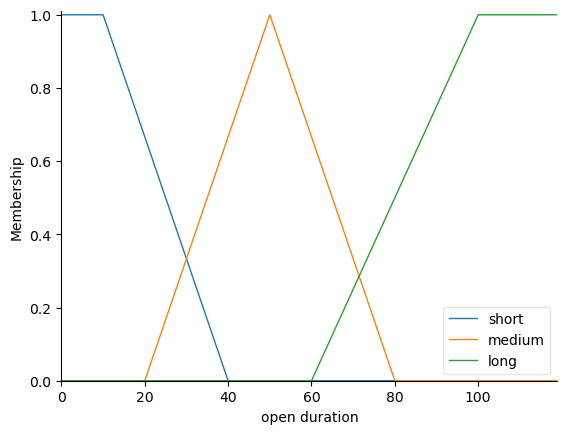

In [20]:
waitingDuration["short"] = fuzz.trapmf(waitingDuration.universe, [0, 0, 5, 40])
waitingDuration["medium"] = fuzz.trimf(waitingDuration.universe, [20, 50, 80])
waitingDuration["long"] = fuzz.trapmf(waitingDuration.universe, [60, 100, 120, 120])
openDuration["short"] = fuzz.trapmf(openDuration.universe, [0, 0, 10, 40])
openDuration["medium"] = fuzz.trimf(openDuration.universe, [20, 50, 80])
openDuration["long"] = fuzz.trapmf(openDuration.universe, [60, 100, 120, 120])
waitingDuration.view()
openDuration.view()

## 3- Knowledge base


In [21]:
rule1 = ctrl.Rule(
    incomingTraffic["light"] & waitingTraffic["light"],
    [waitingDuration["short"], openDuration["short"]],
)


rule2 = ctrl.Rule(
    incomingTraffic["light"] & waitingTraffic["average"],
    [waitingDuration["short"], openDuration["medium"]],
)


rule3 = ctrl.Rule(
    incomingTraffic["light"] & waitingTraffic["heavy"],
    [waitingDuration["short"], openDuration["long"]],
)


rule4 = ctrl.Rule(
    incomingTraffic["average"] & waitingTraffic["light"],
    [waitingDuration["medium"], openDuration["short"]],
)


rule5 = ctrl.Rule(
    incomingTraffic["average"] & waitingTraffic["average"],
    [waitingDuration["medium"], openDuration["medium"]],
)


rule6 = ctrl.Rule(
    incomingTraffic["average"] & waitingTraffic["heavy"],
    [waitingDuration["medium"], openDuration["long"]],
)


rule7 = ctrl.Rule(
    incomingTraffic["heavy"] & waitingTraffic["light"],
    [waitingDuration["long"], openDuration["short"]],
)


rule8 = ctrl.Rule(
    incomingTraffic["heavy"] & waitingTraffic["average"],
    [waitingDuration["long"], openDuration["medium"]],
)


rule9 = ctrl.Rule(
    incomingTraffic["heavy"] & waitingTraffic["heavy"],
    [waitingDuration["long"], openDuration["long"]],
)

## 4- Inference Engine


In [22]:
# add any code if needed

## 5- Defuzzification


In [23]:
waitingDuration.defuzzify_method = "centroid"
openDuration.defuzzify_method = "centroid"

# B. Model Usage


Testing on a single test case and visualising the results.


98.0
98.0


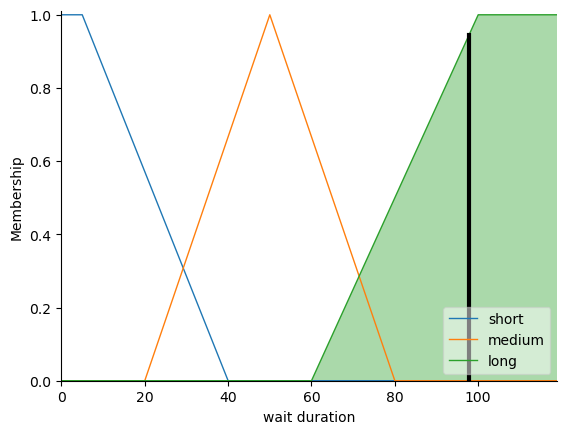

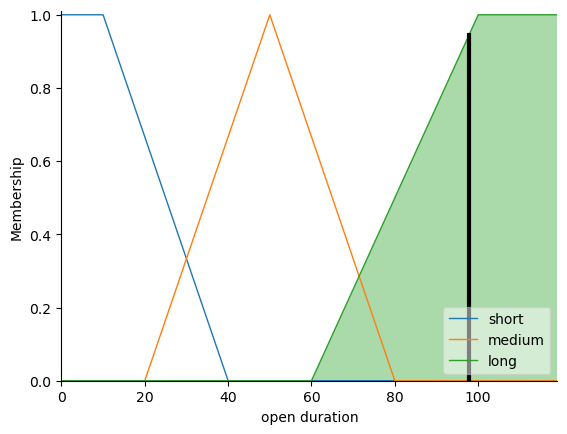

In [24]:
fis = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]
)


fis_simulator = ctrl.ControlSystemSimulation(fis)


# Now, test yur FIS with some inputs & check the outputs


fis_simulator.input["incoming"] = 10000


fis_simulator.input["waiting"] = 10000


fis_simulator.compute()


print(round(fis_simulator.output["wait duration"], 0))


waitingDuration.view(sim=fis_simulator)


print(round(fis_simulator.output["open duration"], 0))


openDuration.view(sim=fis_simulator)

Testing on multiple test cases


In [25]:
incoming_test = [
    0,
    15,
    20,
    25,
    30,
    35,
    40,
    45,
    50,
    55,
    60,
    65,
    70,
    75,
    80,
    85,
    90,
    95,
    100,
    105,
    110,
    115,
    120,
]
waiting_test = [
    0,
    15,
    20,
    25,
    30,
    35,
    40,
    45,
    50,
    55,
    60,
    65,
    70,
    75,
    80,
    85,
    90,
    95,
    100,
    105,
    110,
    115,
    120,
]

 waiting: 120, incoming: 0, wait duration: 14.0, open duration: 98.0
 waiting: 115, incoming: 15, wait duration: 14.0, open duration: 97.0
 waiting: 110, incoming: 20, wait duration: 15.0, open duration: 96.0
 waiting: 105, incoming: 25, wait duration: 28.0, open duration: 94.0
 waiting: 100, incoming: 30, wait duration: 38.0, open duration: 93.0
 waiting: 95, incoming: 35, wait duration: 44.0, open duration: 94.0
 waiting: 90, incoming: 40, wait duration: 50.0, open duration: 96.0
 waiting: 85, incoming: 45, wait duration: 50.0, open duration: 97.0
 waiting: 80, incoming: 50, wait duration: 50.0, open duration: 98.0
 waiting: 75, incoming: 55, wait duration: 50.0, open duration: 87.0
 waiting: 70, incoming: 60, wait duration: 50.0, open duration: 77.0
 waiting: 65, incoming: 65, wait duration: 65.0, open duration: 65.0
 waiting: 60, incoming: 70, wait duration: 77.0, open duration: 50.0
 waiting: 55, incoming: 75, wait duration: 87.0, open duration: 50.0
 waiting: 50, incoming: 80, wa

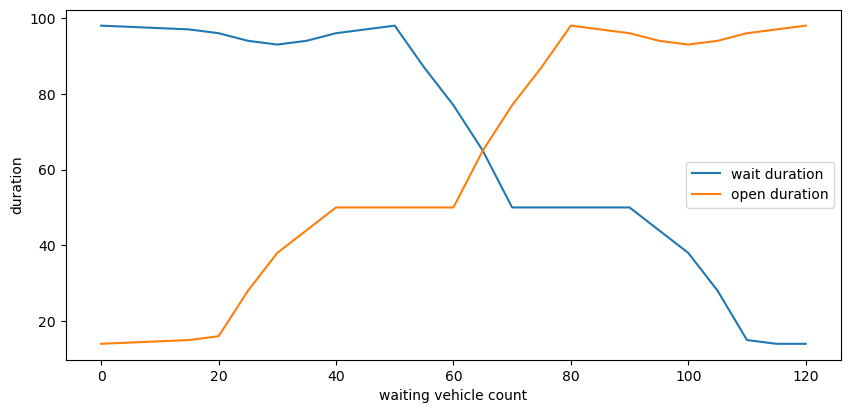

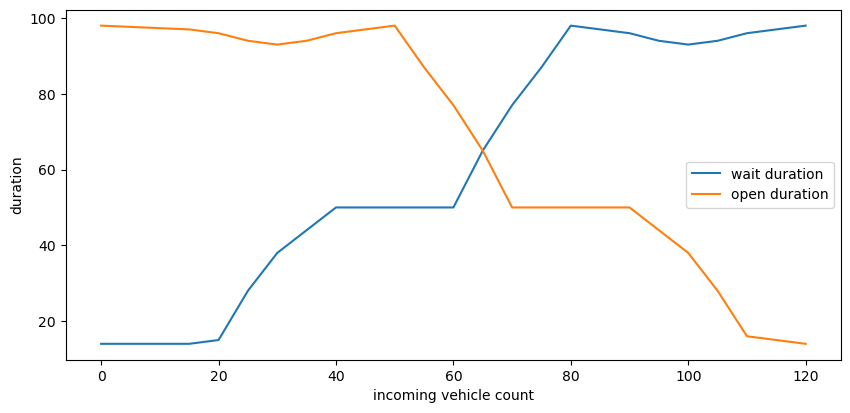

Average wait duration : 65.0
Average open duration : 65.08695652173913


In [26]:
# create a pandas dataframe to store the results
import pandas as pd
import matplotlib.pyplot as plt

results_list = []

# loop through the test data and store the results
for i in range(len(incoming_test)):
    fis_simulator.input["incoming"] = incoming_test[i]
    fis_simulator.input["waiting"] = waiting_test[len(waiting_test) - i - 1]

    fis_simulator.compute()
    print(
        " waiting: "
        + str(waiting_test[len(waiting_test) - i - 1])
        + ", incoming: "
        + str(incoming_test[i])
        + ", wait duration: "
        + str(round(fis_simulator.output["wait duration"], 0))
        + ", open duration: "
        + str(round(fis_simulator.output["open duration"], 0))
    )
    results_list.append(
        {
            "waiting": waiting_test[len(waiting_test) - i - 1],
            "incoming": incoming_test[i],
            "wait duration": round(fis_simulator.output["wait duration"], 0),
            "open duration": round(fis_simulator.output["open duration"], 0),
        }
    )

# Convert the list of dictionaries to a DataFrame
results = pd.DataFrame(results_list)

# plot waiting vs wait duration and open duration with waiting on x axis and wait duration and open duration on y axis
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(results["waiting"], results["wait duration"], label="wait duration")
plt.plot(results["waiting"], results["open duration"], label="open duration")
# add labels and legend
plt.xlabel("waiting vehicle count")
plt.ylabel("duration")
plt.legend()
plt.show()

# plot waiting vs wait duration and open duration with waiting on x axis and wait duration and open duration on y axis
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(results["incoming"], results["wait duration"], label="wait duration")
plt.plot(results["incoming"], results["open duration"], label="open duration")
# add labels and legend
plt.xlabel("incoming vehicle count")
plt.ylabel("duration")
plt.legend()
plt.show()


# avarage wait duration
print("Average wait duration :", results["wait duration"].mean())
# avarage open duration
print("Average open duration :", results["open duration"].mean())

 waiting: 0, incoming: 0, wait duration: 14.0, open duration: 14.0
 waiting: 15, incoming: 15, wait duration: 14.0, open duration: 15.0
 waiting: 20, incoming: 20, wait duration: 15.0, open duration: 16.0
 waiting: 25, incoming: 25, wait duration: 28.0, open duration: 28.0
 waiting: 30, incoming: 30, wait duration: 38.0, open duration: 38.0
 waiting: 35, incoming: 35, wait duration: 44.0, open duration: 44.0
 waiting: 40, incoming: 40, wait duration: 50.0, open duration: 50.0
 waiting: 45, incoming: 45, wait duration: 50.0, open duration: 50.0
 waiting: 50, incoming: 50, wait duration: 50.0, open duration: 50.0
 waiting: 55, incoming: 55, wait duration: 50.0, open duration: 50.0
 waiting: 60, incoming: 60, wait duration: 50.0, open duration: 50.0
 waiting: 65, incoming: 65, wait duration: 65.0, open duration: 65.0
 waiting: 70, incoming: 70, wait duration: 77.0, open duration: 77.0
 waiting: 75, incoming: 75, wait duration: 87.0, open duration: 87.0
 waiting: 80, incoming: 80, wait dur

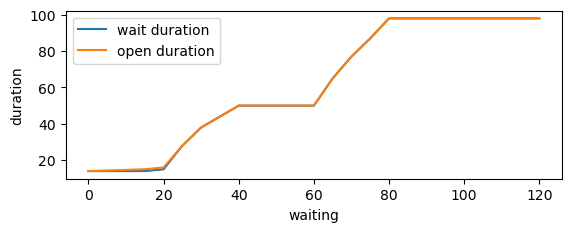

Average wait duration : 65.82608695652173
Average open duration : 65.91304347826087


In [29]:
results_list_2 = []

# loop through the test data and store the results
for i in range(len(incoming_test)):
    fis_simulator.input["incoming"] = incoming_test[i]
    fis_simulator.input["waiting"] = waiting_test[i]

    fis_simulator.compute()
    print(
        " waiting: "
        + str(waiting_test[i])
        + ", incoming: "
        + str(incoming_test[i])
        + ", wait duration: "
        + str(round(fis_simulator.output["wait duration"], 0))
        + ", open duration: "
        + str(round(fis_simulator.output["open duration"], 0))
    )
    results_list_2.append(
        {
            "waiting": waiting_test[i],
            "incoming": incoming_test[i],
            "wait duration": round(fis_simulator.output["wait duration"], 0),
            "open duration": round(fis_simulator.output["open duration"], 0),
        }
    )

# Convert the list of dictionaries to a DataFrame
results_2 = pd.DataFrame(results_list_2)

# plot waiting vs wait duration and open duration with waiting on x axis and wait duration and open duration on y axis
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(results_2["waiting"], results_2["wait duration"], label="wait duration")
plt.plot(results_2["waiting"], results_2["open duration"], label="open duration")
# add labels and legend
plt.xlabel("waiting")
plt.ylabel("duration")
plt.legend()
plt.show()

# avarage wait duration
print("Average wait duration :", results_2["wait duration"].mean())
# avarage open duration
print("Average open duration :", results_2["open duration"].mean())

# Observations and insights

The mean wait duration and mean open duration is almost same for the FIS designed. Redefining the memebership functions has assisted in obtaining the desired results.


In [28]:
# import trafficSimulator

# num_cars_on_main, num_cars_on_side, wait_times_main, wait_times_side = (
#     trafficSimulator.simulate(fis_simulator, verbose=False)
# )

# print("Mean waiting time - main street", np.mean(wait_times_main))
# print("Mean waiting time - side street", np.mean(wait_times_side))
# plt.plot(num_cars_on_main)
# plt.plot(num_cars_on_side)
# plt.legend(["Main", "Side"], loc="lower right")
# plt.title("# cars waiting to cross over time")
# plt.show()